In [4]:
!pip install gymnasium
!pip install stable-baselines3

  Obtaining dependency information for stable-baselines3 from https://files.pythonhosted.org/packages/06/6a/c3098a78a63b5a48e18c11d80b8c532f8b7785d6abb1329cfe3034572161/stable_baselines3-2.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.13 from https://files.pythonhosted.org/packages/3f/14/e105b8ef6d324e789c1589e95cb0ab63f3e07c2216d68b1178b7c21b7d2a/torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.3.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/5e/44/73bea497ac69bafde2ee4269292fa3b41f1198f4

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from model import USV
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN
from stable_baselines3.dqn.policies import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

final_path = np.genfromtxt("dense_lawnmower_pattern.csv", delimiter=",", skip_header=1)
# final_path = np.genfromtxt('turtlebot_positions.csv', delimiter=',', skip_header=1)
# final_path = final_path[::10]
# final_path[:,:2]*=15
initial_positions = [(final_path[0][0], final_path[0][1], final_path[0][2])]
final_path = final_path[:,:2]
# final_path = final_path*15

env = USV(
    v=0,
    dt=0.2,
    path_index=0,
    goal=final_path[-1],
    budget=10,
    initial_positions=initial_positions,
    final_paths=[final_path],
)

model = DQN.load("dqn_communication_optimization_epsfrac07_steps600k_40bud_lawnmower_path")

obs, _ = env.reset()
done = False
total_rewards = 0
ep_var = []
# print(env.path_index)
errors = []
# print(errors)
print("-------")
communicate_indices = []
variances = []
car_positions = [[env.car.x_true, env.car.y_true]]
traj_errors=[np.linalg.norm([env.car.x_true, env.car.y_true]-final_path[env.path_index])]
while not done:
    # if env.path_index <= 100:
    #     action = 0
    # else:
    action, _states = model.predict(
        obs[:5], deterministic=True
    )  # Use the model to predict the action
    # action = 1
    # print(f"action: {action}")
    if action == 1:
        communicate_indices.append(env.path_index)

    # print(f"action: {action}")
    # ep_var.append(np.linalg.norm(env.car.pf_var))
    errors.append(
        np.linalg.norm(
            np.array([env.car.x, env.car.y]) - np.array([env.car.x_true, env.car.y_true])
        ))
    variances.append(np.linalg.norm(env.car.pf_var))
    traj_errors.append(np.linalg.norm([env.car.x_true, env.car.y_true]-final_path[env.path_index]))
    obs, rewards, terminated, truncated, info = env.step_test(
        action
    )  # Take the action in the environment
    # print(f"rewards: {rewards}")
    # print(f"info: {info}")
    car_positions.append([env.car.x_true, env.car.y_true])
    total_rewards += rewards
    done = truncated or terminated
    # print(f"obs: {obs}")

-------


61


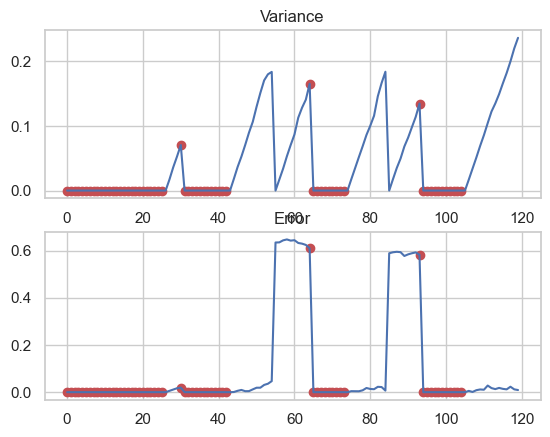

In [12]:
print(len(communicate_indices))
plt.subplot(2, 1, 2)
plt.plot(errors)
plt.scatter(communicate_indices, [errors[i] for i in communicate_indices], c='r')
plt.title("Error")
plt.subplot(2, 1, 1)
plt.plot(variances)
plt.scatter(communicate_indices, [variances[i] for i in communicate_indices], c='r')
plt.title("Variance")
plt.show()

In [13]:


waypoints_followed=0

for i in range(len(traj_errors)):
    if traj_errors[i]<7:
        waypoints_followed+=1
print(waypoints_followed)

print("mean absolute error: ", np.mean(traj_errors))

32
mean absolute error:  10.859979142372033


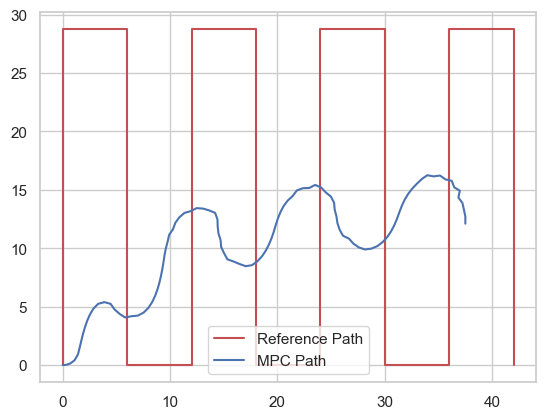

In [14]:
plt.plot(final_path[:, 0], final_path[:, 1], "r", label="Reference Path")
plt.plot(np.array(car_positions)[:, 0], np.array(car_positions)[:, 1], "b", label="MPC Path")
plt.legend()
plt.show()

In [7]:
print(np.array(car_positions))

[[ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73704273e+01  4.49342144e+01]
 [ 1.73904571e+01  4.49359272e+01]
 [ 1.74954129e+01  4.49906127e+01]
 [ 1.77332176e+01  4.50066962e+01]
 [ 1.80898152e+01  4.49713215e+01]
 [ 1.85283523e+01  4.47802666e+01]
 [ 1.89794645e+01  4.43871788e+01]
 [ 1.95502057e+01  4.42020992e+01]
 [ 1.98469852e+01  4.36806378e+01]
 [ 2.01393453e+01  4.31566860e+01]
 [ 2.03680384e+01  4.26019793e+01]
 [ 2.06253479e+01  4.20599536e+01]
 [ 2.11106125e+01  4.17070822e+01]
 [ 2.14626554e+01  4.12212161e+01]
 [ 2.16398439e+01  4.06479760e+01]
 [ 2.22370541e+01  4.07057690e+01]
 [ 2.27042514e+01  4

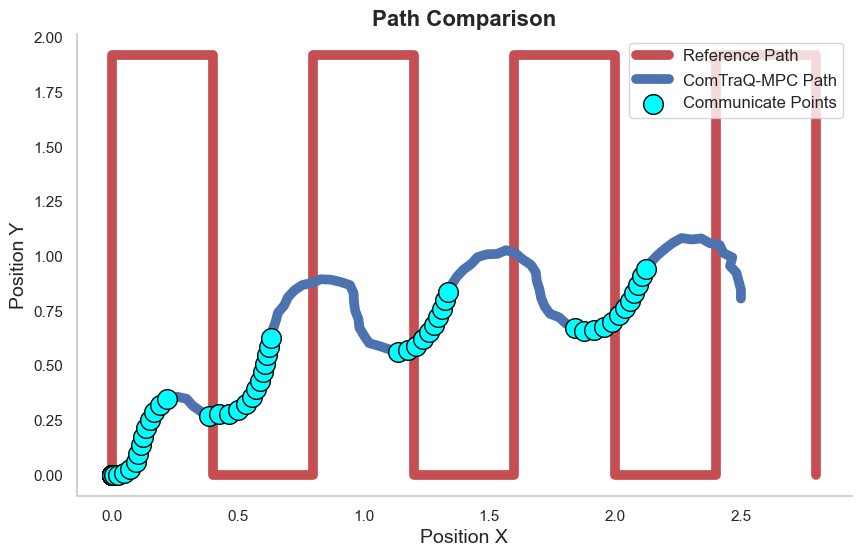

In [15]:


import seaborn as sns
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the reference path
plt.plot(final_path[:, 0]/15, final_path[:, 1]/15, "r-", linewidth=7, label="Reference Path")

# Plot the MPC path
plt.plot(np.array(car_positions)[:, 0]/15, np.array(car_positions)[:, 1]/15, "b-", linewidth=7, label="ComTraQ-MPC Path")

# Highlight communicate points
plt.scatter(np.array(car_positions)[communicate_indices, 0]/15, np.array(car_positions)[communicate_indices, 1]/15, c='cyan', s=200, edgecolor='black', label="Communicate Points", zorder=5)

# If you have a baseline path to plot, uncomment and adjust the following line:
# plt.plot(np.array(car_positions_baseline)[:, 0], np.array(car_positions_baseline)[:, 1], "g-", linewidth=2, label="Baseline Path")

# Add legend with custom font size
plt.legend(fontsize=12)

# Add titles and labels with custom font size for better readability
plt.title("Path Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Position X", fontsize=14)
plt.ylabel("Position Y", fontsize=14)

# Remove the top and right spines for a cleaner look
sns.despine()
plt.grid(False)
plt.show()

In [35]:
np.linalg.norm(final_path[0] - final_path[-1])

57.10432970995237

In [36]:
15*3.8/(15*0.138)

27.53623188405797

In [37]:
82/4

20.5